In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
RESULTS_PATH = "../results/"
DATA_PATH = "../data/"


In [3]:
triplet_results = pd.read_csv(f"{RESULTS_PATH}triplet_predictions.csv")
softmax_results = pd.read_csv(f"{RESULTS_PATH}softmax_predictions.csv")

In [4]:
triplet_results["I7FXTVDP"]

0        0.000772
1        0.000691
2        0.001001
3        0.000755
4        0.001878
           ...   
18811    0.001095
18812    0.001081
18813    0.000735
18814    0.001020
18815    0.000795
Name: I7FXTVDP, Length: 18816, dtype: float64

In [5]:
test_values_df = pd.read_csv(f"{DATA_PATH}test_values.csv")
test_set = pd.read_csv(f"{DATA_PATH}test_labels.csv")

In [6]:
test_set = test_set.set_index("sequence_id")

In [7]:
test_set[test_set==1.0].notnull().any()

00Q4V31T    True
012VT4JK    True
028IO5W2    True
03GRNN7N    True
03Y3W51H    True
            ... 
ZU75P59K    True
ZUI6TDWV    True
ZWFD8OHC    True
ZX06ZDZN    True
ZZJVE4HO    True
Length: 1314, dtype: bool

In [8]:
test_set.loc[:, test_set.any()]

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTRK5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4GGKP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37SHJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JS1MB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_set["output"] = test_set.apply(lambda x: x[x==1.0].index.tolist()[0], axis=1)

In [10]:
test_set["output"]

sequence_id
E0VFT    7GWW4637
TTRK5    IJEA3NUI
2Z7FZ    LXPTXE5K
VJI6E    OL59ZZX5
721FI    I7FXTVDP
           ...   
4GGKP    I0J54PBT
37SHJ    D8MRQA91
JS1MB    VRZZPHI4
N642G    71R7TM8L
BD9BA    THD393NW
Name: output, Length: 18816, dtype: object

In [11]:
triplet_results = triplet_results.set_index("sequence_id")

In [12]:
softmax_results = softmax_results.set_index("sequence_id")

In [13]:
def get_k_top_preds(row):
    row = row.sort_values(ascending=False)
    top_10 = row[:10].index.tolist()
    
    sequence_id = row.name
    sequence_label = test_set.loc[sequence_id, "output"]
    
    if sequence_label in top_10:
        return True
    else:
        return False

In [14]:
predictions_triplet = triplet_results.apply(get_k_top_preds, axis=1)

In [15]:
predictions_softmax = softmax_results.apply(get_k_top_preds, axis=1)

In [16]:
predictions_intersection = predictions_softmax == predictions_triplet

In [17]:
len(predictions_intersection)

18816

How similar both models predictions are

In [18]:
len(predictions_intersection[predictions_intersection==True]) / len(predictions_intersection)

0.9408482142857143

In [19]:
df = pd.DataFrame(columns=["sequence_id", "Correct predictions in common", "Mistakes in common", "Correct prediction triplet", "Correct prediction softmax", "Label"])

In [20]:
df["sequence_id"] = predictions_triplet.index

Correct predictions in common

In [21]:
correct = predictions_softmax & predictions_triplet
len(correct[correct==True])

16481

In [22]:
df.loc[correct.values, "Correct predictions in common"] = True

In [23]:
df.loc[correct.values, "Label"] = 0

Wrong predictions in common

In [24]:
wrong = predictions_softmax | predictions_triplet
len(wrong[wrong==False])

1222

In [25]:
wrong

sequence_id
E0VFT     True
TTRK5     True
2Z7FZ     True
VJI6E     True
721FI     True
         ...  
4GGKP     True
37SHJ     True
JS1MB    False
N642G     True
BD9BA     True
Length: 18816, dtype: bool

In [26]:
df.loc[~wrong.values, "Mistakes in common"] = True
df.loc[~wrong.values, "Label"] = 1

Correct predictions triplet model and wrong softmax model

In [27]:
correct_sequences = predictions_triplet[predictions_triplet == True].index.tolist() 
wrong_sequences = predictions_softmax[predictions_softmax == False].index.tolist() 

In [28]:
correct_sequences = set(correct_sequences)
results = correct_sequences.intersection(wrong_sequences)

In [29]:
len(results)

637

In [30]:
df.loc[df[df.sequence_id.isin(list(results))].index, "Correct prediction triplet"] = True
df.loc[df[df.sequence_id.isin(list(results))].index, "Label"] = 2

In [31]:
df["Label"].value_counts()

0    16481
1     1222
2      637
Name: Label, dtype: int64

In [32]:
test_set[test_set.index.isin(results)]["output"].value_counts()

WM3Q8LBC    37
91Z8RRSB    14
BL2TLVFC    13
BLFM4YKK     8
6UXF7L28     7
            ..
ZB862XHR     1
JO1WTZOB     1
4O5RQHEF     1
CBFKYZ9S     1
1HCQTAYT     1
Name: output, Length: 349, dtype: int64

Correct predictions softmax model and wrong triplet model

In [33]:
correct_sequences = predictions_softmax[predictions_softmax == True].index.tolist() 
wrong_sequences = predictions_triplet[predictions_triplet == False].index.tolist() 

In [34]:
correct_sequences = set(correct_sequences)
results = correct_sequences.intersection(wrong_sequences)

In [35]:
len(results)

476

In [36]:
df.loc[df[df.sequence_id.isin(list(results))].index, "Correct prediction softmax"] = True
df.loc[df[df.sequence_id.isin(list(results))].index, "Label"] = 3

In [37]:
test_set[test_set.index.isin(results)]["output"].value_counts()

I7FXTVDP    159
ON9AXMKF     38
SEH3FI81     13
KRS7ST1L      7
MQKR83SM      6
           ... 
57NGF1YS      1
S15Z6XG6      1
JB8JTFSG      1
GWP6E8FA      1
IPVYEI8G      1
Name: output, Length: 187, dtype: int64

In [38]:
test_set["output"].value_counts()["0FFBBVE1"]

176

In [39]:
differences = predictions_intersection[predictions_intersection==False]

Visualization with Embeddings

In [40]:
import os
import functools
from typing import *
from glob import glob
import pickle

import torch
import numpy as np
import pandas as pd

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data.dataloader import DataLoader
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import Manifold
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from altlabs.index_mapping import create_index_mapping
from altlabs.dataset import (
    noop,
    random_roll,
    SoftmaxDataset,
    limit_sequence_size,
    FactorizationDataset,
)
from altlabs.torch.data import FasterBatchSampler, NoAutoCollationDataLoader
from altlabs.utils import Pipeline

%matplotlib inline

In [41]:
triplet_model_paths = list(sorted(glob("output/daaefeed-3f3f-43a0-b7c2-2abf04e31e72/tensorboard_logs_csv_logs/*/checkpoints/*.ckpt")))
lab_index_mapping_paths = list(sorted(glob("output/daaefeed-3f3f-43a0-b7c2-2abf04e31e72/tensorboard_logs_csv_logs/*/lab_index_mapping.pkl")))
from altlabs.model.conv1d_triplet_classifier import Conv1dTripletClassifier, ModelConfig
triplet_models = [Conv1dTripletClassifier.load_from_checkpoint(path) for path in triplet_model_paths]

stripping - WARNING - Not using Catalysis: No module named 'catalysis'


/home/robot/anaconda3/envs/altlabs/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,
/home/robot/ds-projects/altlabs_codeocean/code/altlabs/dataset.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._sequences = np.array([np.array(s) for s in self._sequences])


In [42]:
device = torch.device("cuda:2")
DATA_PATH = "../data/"

In [43]:
test_set["output"]

sequence_id
E0VFT    7GWW4637
TTRK5    IJEA3NUI
2Z7FZ    LXPTXE5K
VJI6E    OL59ZZX5
721FI    I7FXTVDP
           ...   
4GGKP    I0J54PBT
37SHJ    D8MRQA91
JS1MB    VRZZPHI4
N642G    71R7TM8L
BD9BA    THD393NW
Name: output, Length: 18816, dtype: object

In [44]:
train_values_df = pd.read_csv(f"{DATA_PATH}test_values.csv")
train_labels_df = test_set
input_columns = train_values_df.drop(columns=["sequence_id"]).columns
output_columns = train_labels_df.drop(columns=["output"]).columns
occurrences = np.sum(train_labels_df[output_columns].values, axis=0)
triplet_filtered_out_output_columns = output_columns[
        occurrences < 2
    ]
triplet_train_labels_df = train_labels_df[
        np.sum(train_labels_df[triplet_filtered_out_output_columns].values, axis=1) == 0
    ]
triplet_output_columns = output_columns.drop(triplet_filtered_out_output_columns)
triplet_df = pd.merge(train_values_df, triplet_train_labels_df, on="sequence_id", how="right")
sequence_index_mapping = create_index_mapping(
    "ATGC", include_unkown=True, include_none=False,
)
sequence_index_mapping["N"] = 0

skf = StratifiedKFold(
            n_splits=4,
            random_state=42,
            shuffle=True,
        )
triplet_kfold = skf.split(triplet_df.index, triplet_df[triplet_output_columns].idxmax(axis=1))

sequence_embeddings = []
lab_index_mappings = []
labs = []
for n_fold, ((train_indices, val_indices), model, lab_index_mapping_path) in enumerate(zip(triplet_kfold, triplet_models, lab_index_mapping_paths)):
    if n_fold > 0:
        break
    model.to(device).eval()
    
    train_df = triplet_df
    
    with open(lab_index_mapping_path, "rb") as f:
        lab_index_mapping = pickle.load(f)
    lab_index_mappings.append(lab_index_mapping)
    
    train_dataset = FactorizationDataset(
        train_df,
        sequence_index_mapping,
        lab_index_mapping,
        input_columns,
        lab_column="output",
        negative_proportion=0.0,
        #transform_sequence_fn=transform_sequence_fn,
        test=True,
        bpe=True,
    )
    
    train_batch_sampler = FasterBatchSampler(
            train_dataset, 64, shuffle=False,
        )
    
    sequence_embedding: List[List[float]] = []
    with torch.no_grad():
        for indices in train_batch_sampler:
            batch = train_dataset[indices]
            if isinstance(batch[0], tuple):
                (sequences, extra_inputs, _) = batch[
                    0
                ]  # type: (torch.Tensor, torch.Tensor, torch.Tensor)
            else:
                (sequences, extra_inputs) = batch
            
            sequence_embedding.extend(model.extract_sequence_embedding(sequences.to(device), extra_inputs.to(device)).tolist())
            
    sequence_embedding = np.array(sequence_embedding)
    sequence_embeddings.append(sequence_embedding)
    labs.append(train_df["output"].values.tolist())
    
    lab_index_mappings.append(lab_index_mapping)
    
    model.cpu()

In [45]:
triplet_model = triplet_models[0]
lab_embeddings = triplet_model.lab_embedding.weight.detach().numpy()

In [46]:
tsne_model = TSNE(perplexity=40, n_components=2, learning_rate=10.0, n_iter=2500, random_state=42, n_jobs=4)
new_values = tsne_model.fit_transform(normalize(np.concatenate([sequence_embeddings[0], lab_embeddings])))

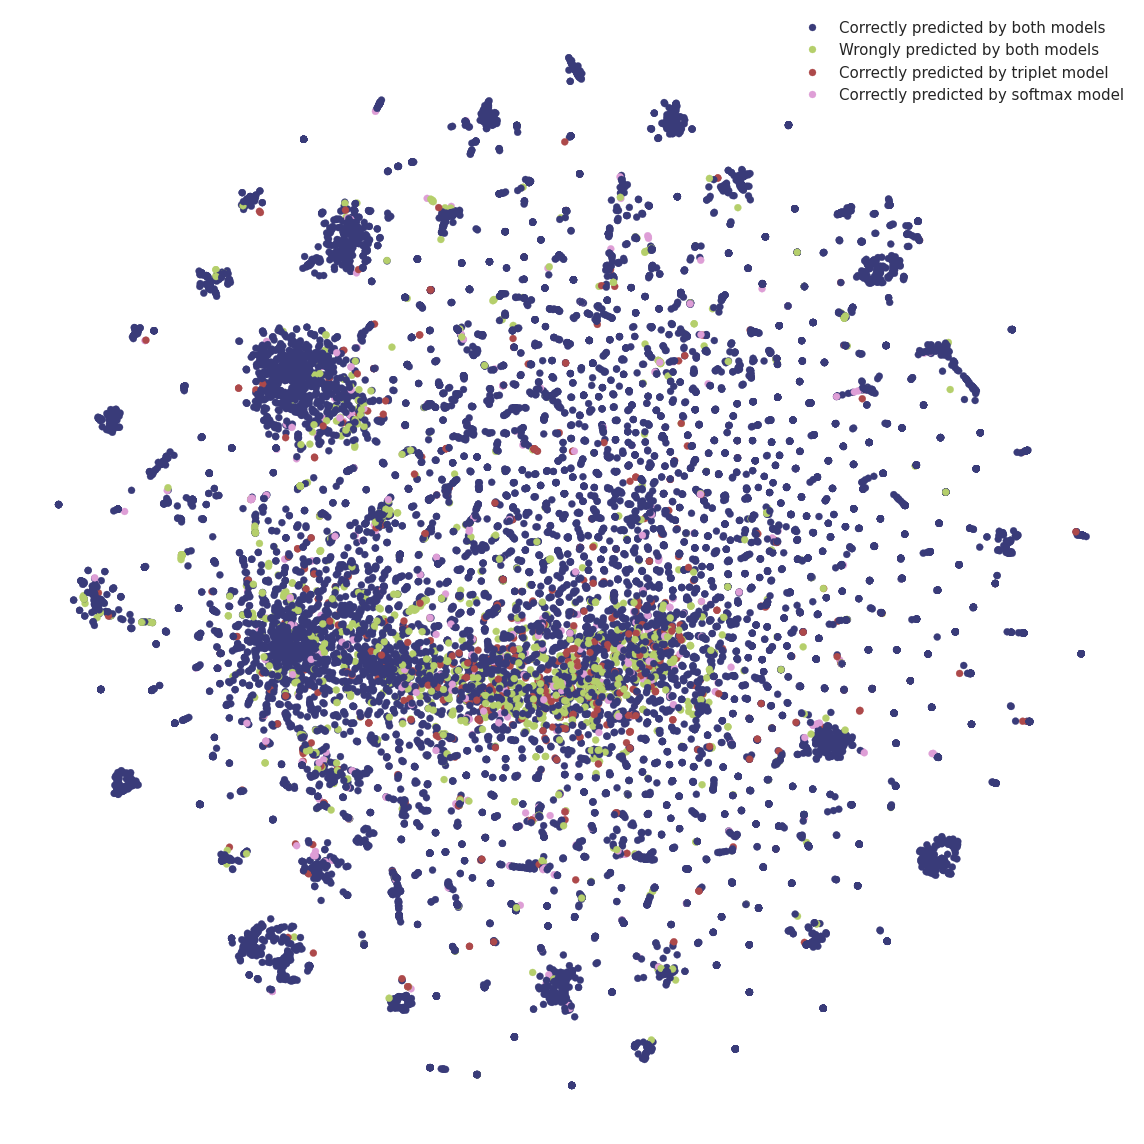

In [47]:
plt.figure(figsize=(16, 16))
scatter = plt.scatter(new_values[:len(sequence_embeddings[0]), 0], new_values[:len(sequence_embeddings[0]), 1], c=df["Label"], cmap=plt.cm.get_cmap("tab20b", 4))
# plt.scatter(new_values[len(sequence_embeddings[0]):, 0], new_values[len(sequence_embeddings[0]):, 1], c="black", marker="+")
#for lab_name, xy in zip(lab_names, new_values[len(sequence_embeddings[0]):]):
#    plt.annotate(lab_name,
#                 xy=xy,
#                 xytext=(5, 2),
#                 textcoords='offset points',
#                 ha='right',
#                 va='bottom')
plt.axis('off')
# produce a legend with the unique colors from the scatter
classes=["Correctly predicted by both models", "Wrongly predicted by both models", "Correctly predicted by triplet model", "Correctly predicted by softmax model"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=15)
plt.tight_layout()
plt.savefig(f'{RESULTS_PATH}tsne_pred_analysis.png', format='png')
plt.show()

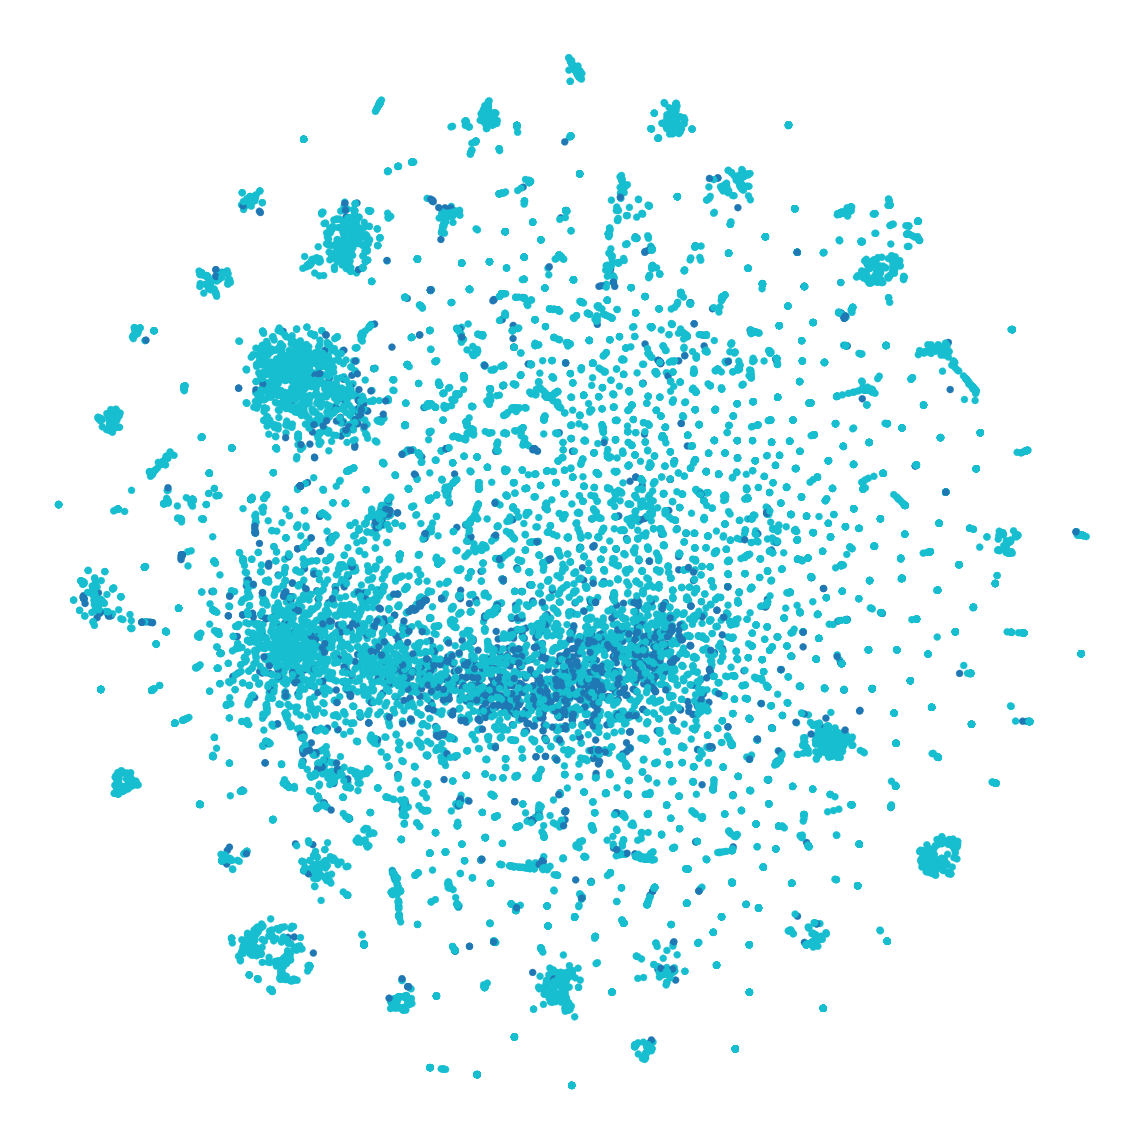

In [48]:
plt.figure(figsize=(16, 16))
plt.scatter(new_values[:len(sequence_embeddings[0]), 0], new_values[:len(sequence_embeddings[0]), 1], c=predictions_softmax, cmap=plt.cm.get_cmap("tab10", 2))
# plt.scatter(new_values[len(sequence_embeddings[0]):, 0], new_values[len(sequence_embeddings[0]):, 1], c="black", marker="+")
#for lab_name, xy in zip(lab_names, new_values[len(sequence_embeddings[0]):]):
#    plt.annotate(lab_name,
#                 xy=xy,
#                 xytext=(5, 2),
#                 textcoords='offset points',
#                 ha='right',
#                 va='bottom')
plt.axis('off')
plt.tight_layout()
# plt.savefig(f'{RESULTS_PATH}tsne_val.png', format='png')
plt.show()